<a href="https://colab.research.google.com/github/Bing-Chilling-07/BCS_Assignments/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2:**

In [71]:
#I have made the assignment in two different methods, one using numpy, pandas and another one using scikit learn, one will be presented after another.

## **1. Exploratory Data Analysis:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('extended_salary_data.csv')
data.head(5)

,YearsExperience,Salary
0,8.1,77884.67
1,19.1,127213.68
2,14.9,103343.52
3,12.4,88988.96
4,4.0,35214.78


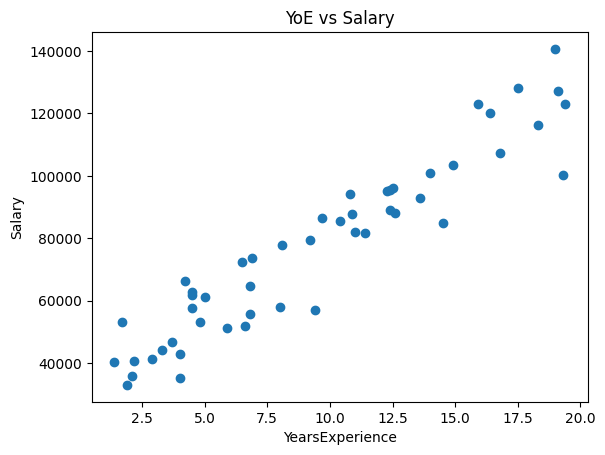

In [5]:
#Scatter Plot of the given data:
plt.scatter(data.YearsExperience, data.Salary)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("YoE vs Salary")
plt.show()

In [6]:
#getting the basic statistical description of the data, and also appending the median and mode rows to the basic description:
basic_description = data.describe()
median = pd.DataFrame(data.median(), columns = ['Median']).T
mode = pd.DataFrame(data.mode().iloc[0], columns = ['Mode']).T
Adv_description = pd.concat([basic_description, median, mode])
Adv_description

,YearsExperience,Salary
count,50.000000,50.00000
mean,9.480000,77370.54740
std,5.485491,28298.92442
min,1.400000,33048.80000
25%,4.500000,53861.88000
50%,9.300000,78598.65000
75%,13.350000,95356.22500
max,19.400000,140646.44000
Median,9.300000,78598.65000
Mode,NaN,NaN


## **2. Build a Linear Regression Model:**

In [7]:
#linear regression function for regular iteration method:
def grad_descent(m_now, b_now, data, L):
  m_gradient = 0
  b_gradient = 0
  n = len(data)
  for i in range(n):
    x = data.iloc[i].YearsExperience
    y = data.iloc[i].Salary
    m_gradient +=  (1/n) * ((m_now * x + b_now) - y) * x
    b_gradient +=  (1/n) * ((m_now * x + b_now) - y)

  m = m_now - (L * m_gradient)
  b = b_now - (L * b_gradient)
  return m, b

In [8]:
#Splitting the Data into training and testing Data:
train_data = data.sample(frac = 0.8, random_state = 1)
test_data = data.drop(train_data.index)
print(train_data.head(5))
print(test_data.head(5))

    YearsExperience     Salary
27             10.8   94035.33
35             16.4  120219.03
40              3.3   44303.28
38             14.0  100917.61
2              14.9  103343.52
    YearsExperience     Salary
0               8.1   77884.67
5               4.0   42801.56
8              12.4   95436.18
9              14.5   84869.60
11             19.4  123149.18


In [9]:
#using scikit-learn, method 1:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(test_data[['YearsExperience']], test_data['Salary'])
m = lr.coef_
b = lr.intercept_
print(m, b)

[4588.33373324] 31245.627692985523


In [ ]:
#using regular iteration, method 2(will not run this in the notebook as it is taking a lot of time(upwards of 30 mins)):
m = 0
b = 0
L = 0.00001
iterations = 100000
for i in range(iterations):
  m, b = grad_descent(m, b, train_data, L)

print(m, b)


## **3. Evaluate the Model:**

In [10]:
#for testing data, I will be creating a new column of predicted values in the testing data frame:
test_data['predicted_values'] = m * test_data['YearsExperience'] + b
print(test_data)

    YearsExperience     Salary  predicted_values
0               8.1   77884.67      68411.130932
5               4.0   42801.56      49598.962626
8              12.4   95436.18      88140.965985
9              14.5   84869.60      97776.466825
11             19.4  123149.18     120259.302118
12             16.8  107230.78     108329.634411
15              4.5   61812.80      51893.129493
16              6.8   55607.82      62446.297079
37              2.9   41509.93      44551.795519
43             18.3  116317.30     115212.135011


In [11]:
import numpy as np

In [12]:
#finding MSE and MAE:
real_salary = test_data['Salary']
predicted_salary = test_data['predicted_values']
MAE = np.mean(np.abs(real_salary - predicted_salary))
MSE = np.mean((real_salary - predicted_salary) ** 2)
print(MAE, MSE)

6136.693292161965 52095782.610536985


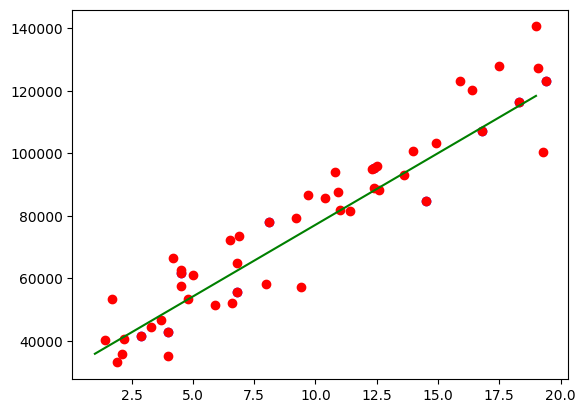

In [22]:
#scattering the data and then plotting the predicted line:
plt.scatter(test_data.YearsExperience, test_data.Salary, color = 'blue')
plt.scatter(data.YearsExperience, data.Salary, color = 'red')
plt.plot(list(range(1, 20)), [m * x + b for x in range(1, 20)], color = 'green')

## **Bonus Task:**

In [14]:
data_2 = pd.read_csv('extended_salary_data_2.csv')    #using a copy of the original data to not cause any disturbance to the original task output

In [29]:
#creating a new column which is related to YoE as a quadratic expression:
data_2['NumProjectsCompleted'] = 4*(data_2['YearsExperience'])
data_2.head(5)

,YearsExperience,Salary,NumProjectsCompleted
0,8.1,77884.67,32.4
1,19.1,127213.68,76.4
2,14.9,103343.52,59.6
3,12.4,88988.96,49.6
4,4.0,35214.78,16.0


In [35]:
#Splitting the Data into training and testing Data:
train_data_2 = data_2.sample(frac = 0.8, random_state = 50)
test_data_2 = data_2.drop(train_data.index)

In [36]:
#passing X as pandas Dataframe and Y as pandas Dataseries
X = train_data_2[['YearsExperience', 'NumProjectsCompleted']]
Y = train_data_2['Salary']

In [37]:
#scikit method of multiple linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, Y)
theta = [0]*3
theta[0], theta[1] = lr.coef_
theta[2] = lr.intercept_
print(theta[0], theta[1], theta[2])

277.34432323256715 1109.3772929302684 32780.80984359645


In [38]:
#for testing data, I will be creating a new column of predicted values in the testing data frame:
test_data_2['predicted_values'] = theta[0] * test_data_2['YearsExperience'] + theta[1] * test_data_2['NumProjectsCompleted'] + theta[2]
print(test_data_2)

    YearsExperience     Salary  NumProjectsCompleted  predicted_values
0               8.1   77884.67                  32.4      70971.123153
5               4.0   42801.56                  16.0      51640.223823
8              12.4   95436.18                  49.6      91244.993181
9              14.5   84869.60                  58.0     101146.185520
11             19.4  123149.18                  77.6     124248.967646
12             16.8  107230.78                  67.2     111990.348559
15              4.5   61812.80                  18.0      53997.650571
16              6.8   55607.82                  27.2      64841.813609
37              2.9   41509.93                  11.6      46453.884979
43             18.3  116317.30                  73.2     119062.628801


In [40]:
#error analysis:
real_salary_2 = test_data_2['Salary']
predicted_salary_2 = test_data_2['predicted_values']
MAE_2 = np.mean(np.abs(real_salary_2 - predicted_salary_2))
MSE_2 = np.mean((real_salary_2 - predicted_salary_2) ** 2)
print(MAE_2, MSE_2)

6681.776603321088 61059813.67163359


In [41]:
#comparing the data gives:
print("the difference in MAE_1 and MAE_2 is: ", MAE_2 - MAE)
print("the difference in MSE_1 and MSE_2 is: ", MSE_2 - MSE)

the difference in MAE_1 and MAE_2 is:  545.0833111591237
the difference in MSE_1 and MSE_2 is:  8964031.061096601
